# Tensor Completion

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
from colour_demosaicing import masks_CFA_Bayer
from timeit import default_timer as timer
from nonten import nonten
from nonten_BPCG import nonten_BPCG

from utils import plot_channel, the_to_q, q_to_the

In [14]:
shape = (90, 60)
start = (100, 100)
image = imread('image/oski.png', 'png')   
image = image[start[0]:start[0]+shape[0], start[1]:start[1]+shape[1], :]

bayer_filter = np.stack(masks_CFA_Bayer(shape), axis=-1).astype(float)
mosaic_image = image * bayer_filter

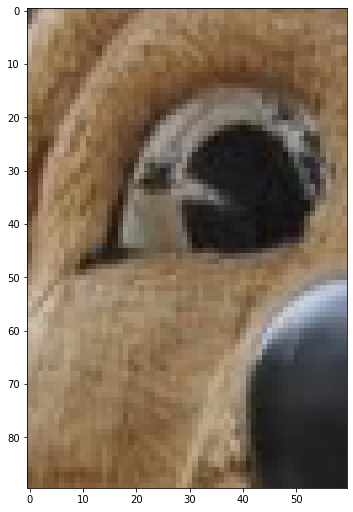

In [15]:
fig, ax = plt.subplots(figsize=(10, 7), constrained_layout=True)
ax.imshow(image)

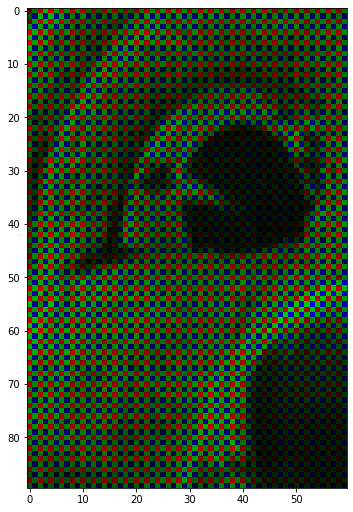

In [16]:
fig, ax = plt.subplots(figsize=(10, 7), constrained_layout=True)
ax.imshow(mosaic_image)

In [19]:
X = np.argwhere(bayer_filter.flatten() == 1).flatten()
Y = mosaic_image.flatten()[X]
r = mosaic_image.shape

rng = np.random.default_rng(112)


In [20]:
out = nonten(X, Y, r, rng, lpar = 1, tol = 1e-6, verbose = True, indices=False, pattern=False, sparse=False, nag=False)

GurobiError: Model too large for size-limited license; visit https://www.gurobi.com/free-trial for a full license

In [ ]:
im = out[0].reshape(image.shape)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


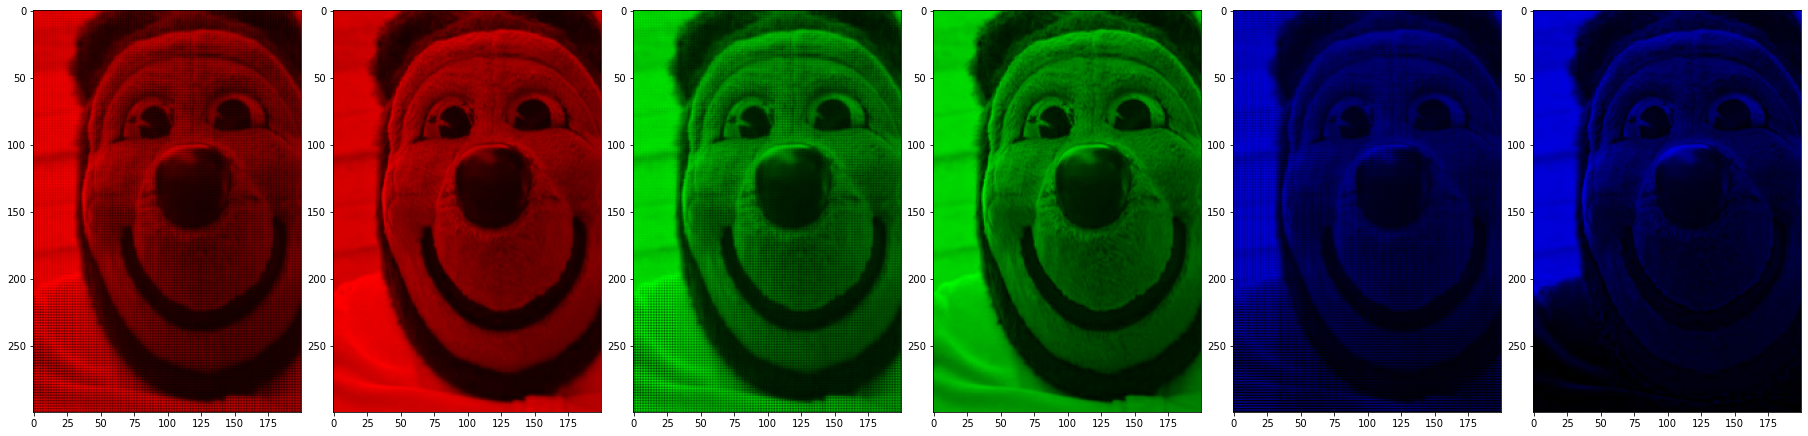

In [5]:
plot_channel(out, image)